<a href="https://colab.research.google.com/github/dhivyasreedhar/Music-Instrument-Recognition/blob/main/spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
classes=['cello','flute','oboe','sax','trumpet','viola']

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd # needed to preview audio file
import os

In [12]:
# Mel Spectrogram (less white around)

def mel_spectrogram(audio_files, full_path):

    # image_path = fullPath + '/spectrograms/'
    # image_path = os.path.join(full_path, '/spectrograms2')
    image_path=full_path
    try:
        os.makedirs(image_path)
    except FileExistsError as exception:
        print('')

    for audio in audio_files:
        y = audio[0]
        sr = audio[1]
        file = audio[2]

        S = librosa.feature.melspectrogram(y=y, sr=sr)
        fig, ax = plt.subplots(figsize=(10.8,5.4))
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=sr)

        fig.savefig(file[:-4] + '.png', transparent=True)
        plt.close(fig)

In [5]:
# load audio
# pathAudio = "BasicsMusicalInstrumClassifi/audio/london_phill_dataset_multi"
# folders = os.listdir(pathAudio)
# fullPath = pathAudio
# print (folders)
# fullerPath=[f"{fullPath}/{cls}" for cls in classes]
# files = os.listdir(fullerPath)
# print (files)
# print (fullerPath)
# audio_files = []
# for file in files:
#       if '.mp3' in file:
#             temp = librosa.load(fullerPath + file)
#             temp = list(temp)
#             temp.append(file)
#             temp = tuple(temp)
#             audio_files.append(temp)

# print('Loaded files from \'' + fullerPath)
# for i in range(len(classes)):
#       mel_spectrogram(audio_files, fullerPath)

# print('Saved spectrograms.')
# for file in audio_files:
#       print(file)
path_audio = "BasicsMusicalInstrumClassifi/audio/london_phill_dataset_multi"
fullPath = path_audio
folders = [folder for folder in os.listdir(path_audio) if os.path.isdir(os.path.join(path_audio, folder))]
print(folders)

audio_files = []
for cls in classes:
    cls_path = os.path.join(path_audio, cls)
    if os.path.exists(cls_path):
        files = [file for file in os.listdir(cls_path) if file.endswith('.mp3')]
        for file in files:
            file_path = os.path.join(cls_path, file)
            try:
                y, sr = librosa.load(file_path, sr=None)
                audio_files.append((y, sr, file))
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Loaded {len(audio_files)} audio files.")

['cello', 'flute', 'sax', 'spectrograms', 'spectrograms1', 'spectrograms2', 'trumpet', 'viola', 'specto2', 'oboe']
Loaded 600 audio files.


In [13]:
# Generate spectrograms
for cls in classes:
    cls_path = os.path.join(path_audio, cls)
   
    cls_audio_files = [(y, sr, file) for y, sr, file in audio_files if file in os.listdir(cls_path)]
    # cls_path="BasicsMusicalInstrumClassifi/audio/london_phill_dataset_multi/spectrograms2"
    mel_spectrogram(cls_audio_files, cls_path)


2025-01-08 14:17:01.565949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736338621.764254    3127 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736338621.817554    3127 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 14:17:02.235721: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


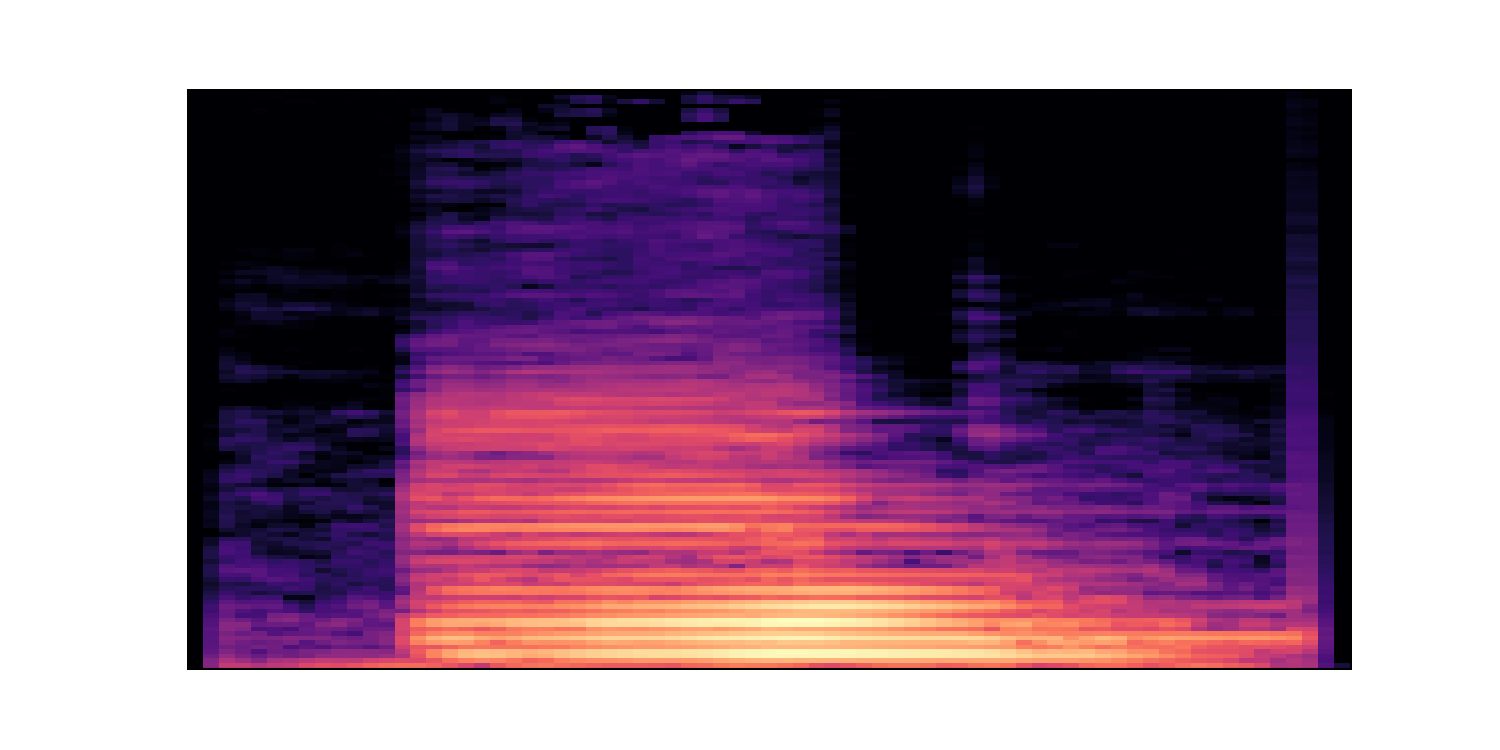

In [7]:
from tensorflow.keras.preprocessing import image
img=image.load_img("BasicsMusicalInstrumClassifi/audio/london_phill_dataset_multi/spectrograms/cello_A2_025_forte_arco-normal.png")
img


In [8]:
img_arr=image.img_to_array(img)
print(img_arr.shape)

(750, 1500, 3)


In [9]:
img_arr=np.expand_dims(img_arr,axis=0)
print(img_arr.shape)

(1, 750, 1500, 3)
